# Netflix PyCaret Regression

Below is a PyCaret Regression model that will analyze the Netflix account data to predict which machine learning module will have the best scores.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pycaret.regression import *

### Loading the DataFrame

In [3]:
df = pd.read_csv('Netflix.csv')
df

,Date,Profile Name,Title,Type,Genre,Duration Seconds,Device Type
0,2013-12-29,Sharleen,Jackass: The Movie,Movie,Comedy,23,Apple TV 3 (revised)
1,2013-12-29,Sharleen,Runaway Bride,Movie,Romantic-Comedy,3610,Apple TV 3 (revised)
2,2013-12-29,Sharleen,The Benchwarmers,Movie,Comedy,4696,Apple TV 3 (revised)
3,2013-12-29,Sharleen,This Means War,Movie,Romantic-Comedy,362,Apple TV 3 (revised)
4,2014-01-01,Sharleen,Bloodline,Show,Thriller,1168,Bell Canada Mediaroom Bell Canada Mediaroom
...,...,...,...,...,...,...,...
8447,2024-10-16,Brette,Monsters,Show,Drama-Crime,5468,Netflix Chrome MAC (Cadmium) HTML 5
8448,2024-10-17,Brette,Monsters,Show,Drama-Crime,4974,Netflix Chrome MAC (Cadmium) HTML 5
8449,2024-10-18,Brette,Monsters,Show,Drama-Crime,2038,Netflix Chrome MAC (Cadmium) HTML 5
8450,2024-10-18,Brette,The Menendez Brothers,Movie,Documentary,32,Netflix Chrome MAC (Cadmium) HTML 5


### Cleaning and Checking Data

In [4]:
df.isnull().sum()

Date                0
Profile Name        0
Title               0
Type                0
Genre               0
Duration Seconds    0
Device Type         0
dtype: int64

#### There are no nulls in the data, so now we will set the data up to resemble the final regression dataframe so the PyCaret regression can properly predict the best model to use.

##### The below EDA is further explained in the Netflix GBR Regression model ipynb

In [5]:
df['Date'] = pd.to_datetime(df['Date']) #passing through the 'datetime' type

In [6]:
df['Year'] = df['Date'].dt.year #taking the year from the 'Date' column and creating a column of it's own
df['Month'] = df['Date'].dt.month #taking the month from the 'Date' column and creating a column of it's own
df['Day'] = df['Date'].dt.day #taking the day from the 'Date' column and creating a column of it's own

In [7]:
cols = ['Year', 'Month', 'Day'] + [col for col in df.columns if col not in ['Year', 'Month', 'Day']] #telling the df to place the new columns at the 
df = df[cols]                                                                                  

In [8]:
df = df.drop(columns = 'Date') # dropping the column 'Date' once we have the new columns

In [9]:
df['Minutes'] = df['Duration Seconds'] / 60 #dividing the total seconds by 60 to get back a new column with the total minutes
df = df.drop(columns='Duration Seconds') #dropping the 'Duration Seconds' column

In [10]:
df = df.drop(columns='Title') #Dropping the column 'Title' from the dataframe and passing through to the dataframe

In [11]:
df = df[df['Profile Name'] == 'Brette'] #filtering the dataframe to only my Netflix account

In [12]:
df

,Year,Month,Day,Profile Name,Type,Genre,Device Type,Minutes
157,2014,3,10,Brette,Show,Drama-Comedy,PC,30.766667
158,2014,3,10,Brette,Movie,Drama,PC,0.133333
160,2014,3,11,Brette,Show,Drama-Comedy,PC,39.633333
162,2014,3,13,Brette,Show,Horror,Apple TV 3 (revised),90.516667
165,2014,3,14,Brette,Show,Horror,Apple TV 3 (revised),206.400000
...,...,...,...,...,...,...,...,...
8444,2024,10,15,Brette,Show,Drama-Crime,Netflix Chrome MAC (Cadmium) HTML 5,183.916667
8447,2024,10,16,Brette,Show,Drama-Crime,Netflix Chrome MAC (Cadmium) HTML 5,91.133333
8448,2024,10,17,Brette,Show,Drama-Crime,Netflix Chrome MAC (Cadmium) HTML 5,82.900000
8449,2024,10,18,Brette,Show,Drama-Crime,Netflix Chrome MAC (Cadmium) HTML 5,33.966667


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3335 entries, 157 to 8450
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          3335 non-null   int32  
 1   Month         3335 non-null   int32  
 2   Day           3335 non-null   int32  
 3   Profile Name  3335 non-null   object 
 4   Type          3335 non-null   object 
 5   Genre         3335 non-null   object 
 6   Device Type   3335 non-null   object 
 7   Minutes       3335 non-null   float64
dtypes: float64(1), int32(3), object(4)
memory usage: 195.4+ KB


### Setting up 

##### Now I will set up the model that will be ran through the PyCaret regression

In [16]:
s = setup(df, target = 'Minutes', session_id = 42) # telling the data is df, the target of the regression will be the 'Minutes' column, the session_id that will identify this data analysis

,Description,Value
0,Session id,42
1,Target,Minutes
2,Target type,Regression
3,Original data shape,"(3335, 8)"
4,Transformed data shape,"(3335, 25)"
5,Transformed train set shape,"(2334, 25)"
6,Transformed test set shape,"(1001, 25)"
7,Numeric features,3
8,Categorical features,4
9,Preprocess,True


#### Comparing Models

##### We will now pass 's' through the model and have it compare all regression models excluding the catboost model that does not belong to the sklearn library

In [17]:
s.compare_models(exclude='catboost')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,37.4124,2575.6918,50.5764,0.1151,1.1892,50.0062,0.0950
br,Bayesian Ridge,38.0278,2658.2872,51.3719,0.0894,1.2123,52.1101,0.0430
ridge,Ridge Regression,38.1394,2666.9425,51.4685,0.0852,1.2105,51.4325,0.0410
lasso,Lasso Regression,37.9773,2674.2195,51.5164,0.0848,1.2152,52.3979,0.0460
llar,Lasso Least Angle Regression,37.9773,2674.2197,51.5164,0.0848,1.2152,52.3979,0.0440
lr,Linear Regression,38.1766,2677.1323,51.5664,0.0817,1.2110,51.4163,0.0410
en,Elastic Net,37.7955,2690.1923,51.6632,0.0798,1.2162,53.2774,0.0430
omp,Orthogonal Matching Pursuit,37.7429,2714.6231,51.8965,0.0715,1.2186,53.5772,0.0420
huber,Huber Regressor,36.8428,2749.3898,52.1907,0.0621,1.1743,46.9756,0.0540
lightgbm,Light Gradient Boosting Machine,38.4607,2745.3605,52.2130,0.0523,1.2065,49.4266,0.2630


GradientBoostingRegressor(random_state=42)

### Defining & Creating Best Model

##### Now that we know the recommended model, we will create it in pycaret using 'gbr' that pycaret uses to define the Gradient Boosting Regressor

In [18]:
gbr_mdl = s.create_model('gbr') #passing the created model to 'gbr_mdl'

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,38.0952,2705.0824,52.0104,0.1229,1.1429,45.1310
1,36.2224,2237.3939,47.3011,-0.0338,1.1755,20.1595
2,39.9283,3045.2812,55.1841,0.1137,1.2176,44.6901
3,38.9183,2710.4362,52.0618,0.1636,1.1595,43.9107
4,36.1660,2684.6056,51.8132,0.1350,0.9802,4.9686
5,41.0170,3253.7528,57.0417,0.0918,1.1437,76.3178
6,31.4406,1702.7035,41.2638,0.1497,1.1398,64.1624
7,38.1075,2675.3675,51.7240,0.1373,1.3494,103.3670
8,37.9536,2477.5523,49.7750,0.0515,1.2318,46.0882


In [19]:
gbr_mdl

GradientBoostingRegressor(random_state=42)

### Tuned Model

##### We will create a tuned model that adjusts the hyperparameters of the current model to see if it improves accuracy and performs better

In [20]:
tuned_gbr_mdl = s.tune_model(gbr_mdl)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,39.2448,2724.3938,52.1957,0.1166,1.1938,47.6649
1,36.4394,2120.1491,46.0451,0.0204,1.2100,19.9467
2,40.4294,3118.2730,55.8415,0.0925,1.2438,45.2528
3,39.6445,2779.9443,52.7252,0.1422,1.1679,41.9371
4,37.2201,2767.8996,52.6108,0.1081,1.0226,8.4290
5,41.3852,3259.4325,57.0914,0.0903,1.1665,78.0619
6,31.8838,1655.3075,40.6855,0.1734,1.1667,67.7071
7,38.4649,2739.2224,52.3376,0.1167,1.3597,101.6167
8,38.8529,2448.2059,49.4793,0.0628,1.2611,45.1933


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


##### Since the original model performed better, we will use that in the machine learning regression model

### Visualizing GBR_MDL

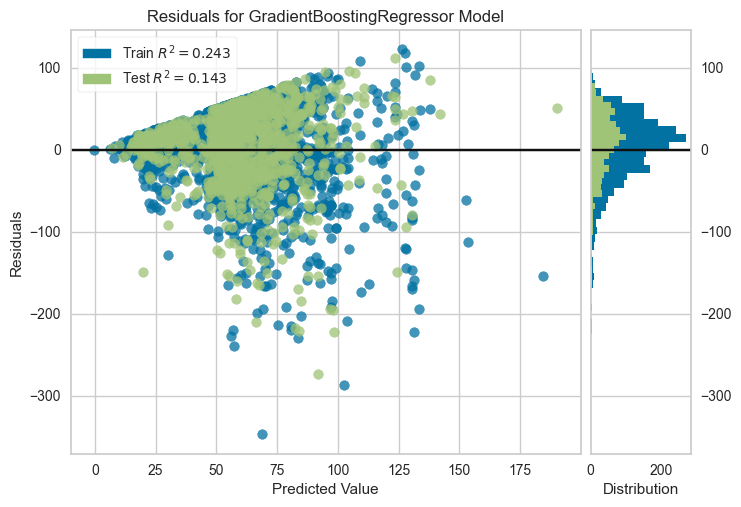

In [24]:
plot_model(gbr_mdl, plot='residuals')

Looking at the Residuals score visual, we can see the test score is lower than our train score meaning this model performs slightly better on the training data.

### Prediction for Residual Scores

#### Below is the Residuals model that we will use to compare our GBR Regression PyCaret Model to the GBR Regression I will run myself.

In [23]:
preds = s.predict_model(gbr_mdl)
preds

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,36.1789,2347.1877,48.4478,0.1428,1.1575,26.3048


,Year,Month,Day,Profile Name,Type,Genre,Device Type,Minutes,prediction_label
4829,2019,6,17,Brette,Show,Drama,Apple TV 3 (revised),23.666666,81.904924
6710,2021,9,4,Brette,Movie,Romantic-Comedy,iPhone 12 Pro,7.683333,25.971000
4381,2019,3,11,Brette,Movie,Thriller,Safari MAC (Cadmium),7.350000,66.559644
7746,2023,5,7,Brette,Movie,Comedy,Apple TV 3 (revised),12.550000,32.527879
271,2014,5,5,Brette,Movie,Romantic-Comedy,Apple TV 3 (revised),90.566666,64.987180
...,...,...,...,...,...,...,...,...,...
1078,2015,10,12,Brette,Show,Comedy,Netflix Chrome MAC (Cadmium) HTML 5,131.750000,51.577435
4917,2019,7,10,Brette,Show,Drama-Comedy,Safari MAC (Cadmium),101.883331,69.871002
4667,2019,5,9,Brette,Show,Comedy,Apple iPhone 8 (GSM),3.116667,19.360137
535,2014,11,6,Brette,Show,Drama,Internet Explorer (Cadmium),41.283333,28.105468


##### Currently, the R2 score that predicts the accuracy of the model is 14.2% and the RMSE that predicts the errors the model may make is 48.4%.